In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('Clustering_gmm.csv')
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  500 non-null    float64
 1   Height  500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


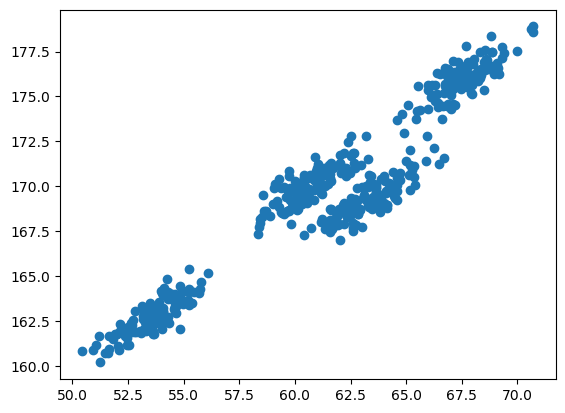

In [15]:
plt.scatter(df['Weight'], df['Height'])

In [16]:
from sklearn.cluster import KMeans

C:\Users\jeanp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jeanp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


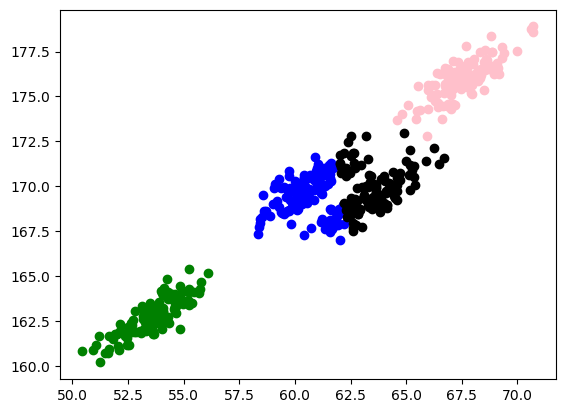

In [17]:
km = KMeans(n_clusters = 4)
km.fit(df)
df_pred = df.copy()

pred = km.labels_
df_pred['Cluster'] = pred

colores = ['blue', 'green', 'pink', 'black']

for k in range(0,4):
    data = df_pred[df_pred['Cluster']==k]
    plt.scatter(data['Weight'], data['Height'], c = colores[k])
    
plt.show()

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
silhouette_score(X=df, labels=pred)

0.6016775536103698

In [20]:
from sklearn.mixture import GaussianMixture

C:\Users\jeanp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


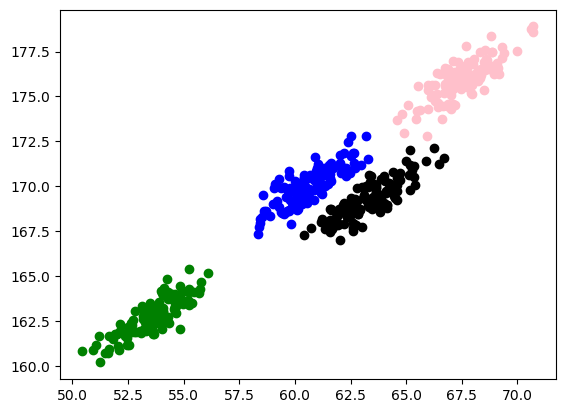

In [25]:
gm = GaussianMixture(n_components = 4)
gm.fit(df)
df_pred_gm = df.copy()

pred_gm = gm.predict(df)
df_pred_gm['Cluster'] = pred_gm

colores = ['blue', 'green', 'pink', 'black']

for k in range(0,4):
    data = df_pred_gm[df_pred_gm['Cluster']==k]
    plt.scatter(data['Weight'], data['Height'], c = colores[k])
    
plt.show()

In [26]:
silhouette_score(X=df, labels = pred_gm)

0.6009974999855162